# Blendo Games Case Analysis: Internet Marketing (PPC) Optimization

In [2]:
#import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df = pd.read_excel('./TA1.xlsx') #import data from excel file
print(df.shape) 
df.head()

(2333, 13)


,Publisher,Keyword,Ad Group,Keyword Type,Clicks,Impressions,CTR,Avg CPC,Total Advertising Cost,Avg Position,Conversions,Revenue per Conversion,Total Revenue
0,Overture,fun games,Kid's Games,exact,245,3705,0.0661,0.38,91.92,1.78,14,117.535033,1645.490458
1,Overture,math games,Math Games,phrase,54,1775,0.0304,0.51,27.73,2.76,5,120.013201,600.066004
2,Overture,For kids games,Kid's Games,broad,70,1019,0.0687,0.25,17.35,2.53,6,100.423288,602.539728
3,Overture,kids games,Kid's Games,phrase,45,963,0.0467,0.21,9.31,3.52,5,114.841613,574.208065
4,Overture,www.games,Kid's Games,broad,5,465,0.0108,0.12,0.60,4.29,0,110.614357,0.000000


# 1. Publisher Performance Analysis:

Identifying the highest Return on Advertising (ROA) Dollar among Google, MSN, Overture, and Yahoo.

> **Yahoo-US** has the highest return on advertising, the ROA is 118.61

In [3]:
def add_metrics(given_df: pd.DataFrame) -> None:
    given_df['ROA'] = given_df['Total Revenue'] / given_df['Total Advertising Cost']
    given_df['CTR'] = given_df['Clicks'] / given_df['Impressions']
    given_df['CVR'] = given_df['Conversions'] / given_df['Impressions']
    given_df['CTCVR'] = given_df['Conversions'] / given_df['Clicks']
    given_df['CPC'] = given_df['Total Advertising Cost'] / given_df['Clicks']
    given_df['Revenue per Conversion'] = given_df['Total Revenue'] / given_df['Conversions']
    given_df['Revenue per Impression'] = given_df['Total Revenue'] / given_df['Impressions']
    given_df['Revenue per Click'] = given_df['Total Revenue'] / given_df['Clicks']


In [4]:
publisher_df = pd.pivot_table(df, values=['Clicks', 'Impressions', 'Total Advertising Cost', 'Conversions', 'Total Revenue'], index=['Publisher'], aggfunc=np.sum, margins=True)
add_metrics(publisher_df)
publisher_df

,Clicks,Conversions,Impressions,Total Advertising Cost,Total Revenue,ROA,CTR,CVR,CTCVR,CPC,Revenue per Conversion,Revenue per Impression,Revenue per Click
Publisher,,,,,,,,,,,,,
Google-Global,1886,280,46368,1326.04,43103.298733,32.505278,0.040675,0.006039,0.148462,0.703097,153.940353,0.929592,22.854347
Google-US,3765,716,59880,2730.59,174012.797061,63.727179,0.062876,0.011957,0.190173,0.725256,243.034633,2.906025,46.218538
MSN-Global,466,348,74731,293.21,31873.507235,108.705389,0.006236,0.004657,0.746781,0.629206,91.590538,0.426510,68.398084
MSN-US,289,140,42440,185.76,19103.986289,102.842303,0.006810,0.003299,0.484429,0.642768,136.457045,0.450141,66.103759
Overture,587,63,13202,202.15,6679.198070,33.040802,0.044463,0.004772,0.107325,0.344378,106.019017,0.505923,11.378532
Yahoo-Global,717,154,77989,479.60,22126.577844,46.135483,0.009194,0.001975,0.214784,0.668898,143.679077,0.283714,30.859941
Yahoo-US,617,173,67990,284.55,33750.377869,118.609657,0.009075,0.002544,0.280389,0.461183,195.088889,0.496402,54.700775
All,8327,1874,382600,5501.90,330649.743102,60.097374,0.021764,0.004898,0.225051,0.660730,176.440631,0.864218,39.708147


In [5]:
df.columns

Index(['Publisher', 'Keyword', 'Ad Group', 'Keyword Type', 'Clicks',
       'Impressions', 'CTR', 'Avg CPC', 'Total Advertising Cost',
       'Avg Position', 'Conversions', 'Revenue per Conversion',
       'Total Revenue'],
      dtype='object')

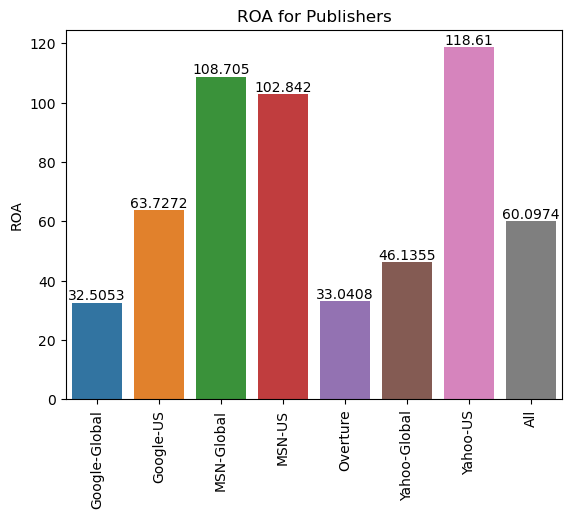

In [5]:
ax = sns.barplot(x=publisher_df.index.tolist(), y=publisher_df['ROA'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)

plt.title('ROA for Publishers')
plt.savefig('ROA_Publisher.png')

plt.show()

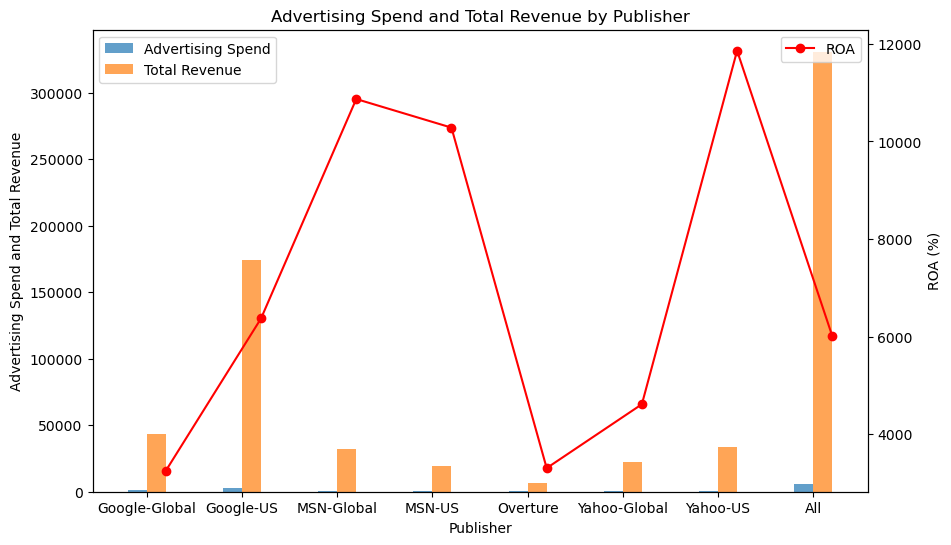

In [45]:
advertising_spend = publisher_df['Total Advertising Cost']
total_revenue = publisher_df['Total Revenue']

# Normalize ROI for better visualization
normalized_roa = np.array(publisher_df['ROA'])*100

# Plotting the grouped bar chart
bar_width = 0.2
index = np.arange(len(publisher_df.index))

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bars for Advertising Total Advertising Cost
bar1 = ax1.bar(index - bar_width, advertising_spend, bar_width, label='Advertising Spend', alpha=0.7)

# Bars for Impressions
bar2 = ax1.bar(index, total_revenue, bar_width, label='Total Revenue', alpha=0.7)

ax1.set_xlabel('Publisher')
ax1.set_ylabel('Advertising Spend and Total Revenue')
ax1.set_title('Advertising Spend and Total Revenue by Publisher')
ax1.set_xticks(index - bar_width / 2)
ax1.set_xticklabels(publisher_df.index)  # Use t1.index for x-axis labels
ax1.legend(loc='upper left')

ax2 = ax1.twinx()

# Line plot for ROA
line = ax2.plot(index + bar_width / 2, normalized_roa, color='red', marker='o', label='ROA')
ax2.set_ylabel('ROA (%)')
ax2.legend(loc='upper right')

plt.savefig('AdSpend_TotalRevenue_Pub.png')
# Show the plot
plt.show()

# 2. Analysis: Evaluating the Need for Improvement in Google's Search Side Copy

Does Google require an improvement on search side copy? Why/Why Not?

> No, Google doesn't need an improvement on search side copy, because the CTR is high.

In [46]:
publisher_df.sort_values(by='CTR', ascending=False)

,Clicks,Conversions,Impressions,Total Advertising Cost,Total Revenue,ROA,CTR,CVR,CTCVR,CPC,Revenue per Conversion,Revenue per Impression,Revenue per Click
Publisher,,,,,,,,,,,,,
Google-US,3765,716,59880,2730.59,174012.797061,63.727179,0.062876,0.011957,0.190173,0.725256,243.034633,2.906025,46.218538
Overture,587,63,13202,202.15,6679.198070,33.040802,0.044463,0.004772,0.107325,0.344378,106.019017,0.505923,11.378532
Google-Global,1886,280,46368,1326.04,43103.298733,32.505278,0.040675,0.006039,0.148462,0.703097,153.940353,0.929592,22.854347
All,8327,1874,382600,5501.90,330649.743102,60.097374,0.021764,0.004898,0.225051,0.660730,176.440631,0.864218,39.708147
Yahoo-Global,717,154,77989,479.60,22126.577844,46.135483,0.009194,0.001975,0.214784,0.668898,143.679077,0.283714,30.859941
Yahoo-US,617,173,67990,284.55,33750.377869,118.609657,0.009075,0.002544,0.280389,0.461183,195.088889,0.496402,54.700775
MSN-US,289,140,42440,185.76,19103.986289,102.842303,0.006810,0.003299,0.484429,0.642768,136.457045,0.450141,66.103759
MSN-Global,466,348,74731,293.21,31873.507235,108.705389,0.006236,0.004657,0.746781,0.629206,91.590538,0.426510,68.398084


# 3. Analysis: Evaluating the Effectiveness of Yahoo's Website Side Copy

Does Yahoo require an improvement on website side copy? Why/Why Not?

> Yes, because the CVR is low


In [47]:
publisher_df.sort_values(by='CVR', ascending=False)

,Clicks,Conversions,Impressions,Total Advertising Cost,Total Revenue,ROA,CTR,CVR,CTCVR,CPC,Revenue per Conversion,Revenue per Impression,Revenue per Click
Publisher,,,,,,,,,,,,,
Google-US,3765,716,59880,2730.59,174012.797061,63.727179,0.062876,0.011957,0.190173,0.725256,243.034633,2.906025,46.218538
Google-Global,1886,280,46368,1326.04,43103.298733,32.505278,0.040675,0.006039,0.148462,0.703097,153.940353,0.929592,22.854347
All,8327,1874,382600,5501.90,330649.743102,60.097374,0.021764,0.004898,0.225051,0.660730,176.440631,0.864218,39.708147
Overture,587,63,13202,202.15,6679.198070,33.040802,0.044463,0.004772,0.107325,0.344378,106.019017,0.505923,11.378532
MSN-Global,466,348,74731,293.21,31873.507235,108.705389,0.006236,0.004657,0.746781,0.629206,91.590538,0.426510,68.398084
MSN-US,289,140,42440,185.76,19103.986289,102.842303,0.006810,0.003299,0.484429,0.642768,136.457045,0.450141,66.103759
Yahoo-US,617,173,67990,284.55,33750.377869,118.609657,0.009075,0.002544,0.280389,0.461183,195.088889,0.496402,54.700775
Yahoo-Global,717,154,77989,479.60,22126.577844,46.135483,0.009194,0.001975,0.214784,0.668898,143.679077,0.283714,30.859941


# 4. Analysis: Funding Allocation Decision Between Yahoo and MSN

The company intends to increase funding for Yahoo but decrease funding for MSN because Yahoo has a decent CTR but MSN has the lowest CTR among all publishers. Would you support this decision? Why/Why not?

> Despite MSN having the lowest Click-Through Rate (CTR) among all publishers, it boasts the highest conversion rate among the four platforms, indicating that the higher portion of users clicking on ads convert into desired actions, such as making a purchase.
>
> Furthermore, the platform's low Average Cost Per Click (Avg. CPC) contributes to having the lowest Total Advertising Costs among all four. This cost-effectiveness results in a higher Return on Ad Spend (ROAS) for MSN compared to other platforms. The combination of a high conversion rate and lower advertising costs makes MSN a favorable choice for maximizing return on investment.
>
> Therefore, while we cannot fully support the decision to decrease funding for MSN, we strongly recommend revising the Ad Copy to improve the CTR metric.

In [48]:
df.columns

Index(['Publisher', 'Keyword', 'Ad Group', 'Keyword Type', 'Clicks',
       'Impressions', 'CTR', 'Avg CPC', 'Total Advertising Cost',
       'Avg Position', 'Conversions', 'Revenue per Conversion',
       'Total Revenue'],
      dtype='object')

In [49]:
df_unified = df.copy()
df_unified['Unified_Publisher'] = df['Publisher'].replace({
    'Google-US': 'Google',
    'Yahoo-US': 'Yahoo',
    'Google-Global': 'Google',
    'Yahoo-Global': 'Yahoo',
    'MSN-Global': 'MSN',
    'Overture': 'Overture',
    'MSN-US': 'MSN'
})

t51 = df_unified.pivot_table(values=['Clicks','Impressions',  
                    'Total Advertising Cost','Conversions', 'Total Revenue'], 
                     index=['Unified_Publisher'], aggfunc=np.mean)

t52 = df_unified.pivot_table(values=['CTR', 'Avg CPC','Avg Position',
                    'Revenue per Conversion'], 
                     index=['Unified_Publisher'], aggfunc=np.mean)

t5 = pd.concat([t51, t52], axis=1)

t5['ROA'] = t5['Total Revenue']/t5['Total Advertising Cost']

# t5.to_csv('uni_pub.csv')
t5

,Clicks,Conversions,Impressions,Total Advertising Cost,Total Revenue,Avg CPC,Avg Position,CTR,Revenue per Conversion,ROA
Unified_Publisher,,,,,,,,,,
Google,6.959360,1.226601,130.847291,4.995850,267.384354,0.538879,4.253805,0.031036,214.412173,53.521296
MSN,0.919610,0.594397,142.717418,0.583398,62.091953,0.233764,4.324872,0.003718,117.770265,106.431496
Overture,5.485981,0.588785,123.383178,1.889252,62.422412,0.123925,3.245140,0.052358,111.316127,33.040802
Yahoo,2.249578,0.551433,246.170320,1.288617,94.227581,0.302614,4.317386,0.006025,164.694895,73.123020


In [50]:
#ROA
# Calculate mean
roa_mean = t5['ROA'].mean()
# Calculate median
roa_median = t5['ROA'].median()
# Calculate mode
roa_mode = t5['ROA'].mode().values[0]  # Mode returns a Series, take the first value

# Display the results
print("ROA Stats:")
print(f"Mean: {roa_mean}")
print(f"Median: {roa_median}")
print(f"Mode: {roa_mode}")

#Total Revenue
# Calculate mean
rev_mean = t5['Total Revenue'].mean()
# Calculate median
rev_median = t5['Total Revenue'].median()
# Calculate mode
rev_mode = t5['Total Revenue'].mode().values[0]  # Mode returns a Series, take the first value

# Display the results
print("\nRevenue Stats:")
print(f"Mean: {rev_mean}")
print(f"Median: {rev_median}")
print(f"Mode: {rev_mode}")

# Calculate median
ads_median = t5['Total Advertising Cost'].median()


ROA Stats:
Mean: 66.52915341540712
Median: 63.32215808605963
Mode: 33.04080173095177

Revenue Stats:
Mean: 121.53157518353606
Median: 78.32499658627701
Mode: 62.09195313456306


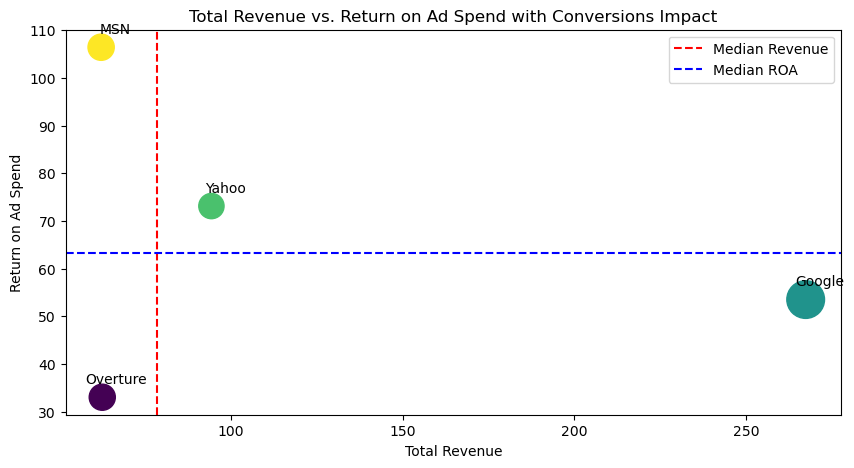

In [52]:
#use bubble chart to visualize
x = t5['Total Revenue']
y = t5['ROA']
size = t5['Conversions']*600
color = np.random.rand(4)

x_glb = rev_median
y_glb = roa_median

plt.figure(figsize = (10,5))
#plt.axis([-0.1,1,0.8,2]) #get with practice
plt.xlabel('Total Revenue')
plt.ylabel('Return on Ad Spend')
plt.title('Total Revenue vs. Return on Ad Spend with Conversions Impact')

plt.scatter(x,y,s = size, c = color)

# Plotting mean lines
plt.axvline(x=x_glb, color='red', linestyle='--', label='Median Revenue')
plt.axhline(y=y_glb, color='blue', linestyle='--', label='Median ROA')


for xi,yi, i in zip(x,y,x.index):
    plt.annotate(i,(xi,yi), textcoords = 'offset points',xytext = (10,10), ha = 'center')

plt.legend()
# plt.savefig('ROAS_Pub.png')
plt.show()

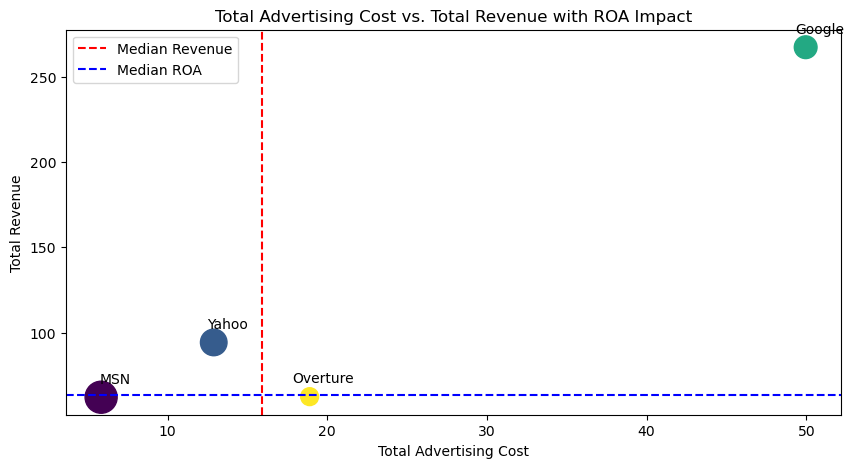

In [53]:
#use bubble chart to visualize
x= t5['Total Advertising Cost']*10
y = t5['Total Revenue']
size = t5['ROA']*5
color = np.random.rand(4)

x_glb = ads_median*10
y_glb = roa_median

plt.figure(figsize = (10,5))
#plt.axis([-0.1,1,0.8,2]) #get with practice
plt.xlabel('Total Advertising Cost')
plt.ylabel('Total Revenue')
plt.title('Total Advertising Cost vs. Total Revenue with ROA Impact')

plt.scatter(x,y,s = size, c = color)

# Plotting mean lines
plt.axvline(x=x_glb, color='red', linestyle='--', label='Median Revenue')
plt.axhline(y=y_glb, color='blue', linestyle='--', label='Median ROA')

for xi,yi, i in zip(x,y,x.index):
    plt.annotate(i,(xi,yi), textcoords = 'offset points',xytext = (10,10), ha = 'center')

plt.legend()
# plt.savefig('AdSpend_Vs_Rev_Pub.png')
plt.show()

# 5. Optimizing Keyword Strategy: Evaluating the Impact of Match Types on ROA

The company expects that the exact match and phrase match keywords would provide higher ROA compared to broad match keywords. While updating their strategy they are thinking about bidding on only exact and phrase match keywords. Would you support this decision? Why/Why Not?

> Upon thorough analysis, it is evident that the initial hypothesis suggesting that exact match keywords yield higher ROA compared to broad match keywords is not accurate. Consequently, we cannot support the decision to bid solely on exact and phrase match keywords. Contrarily, the data reveals that broad match keywords lead to higher ROA, followed by phrase match, and exact match at the lowest.

In [56]:
keywordtype_df = pd.pivot_table(df, values=['Clicks', 'Impressions', 'Total Advertising Cost', 'Conversions', 'Total Revenue'], index=['Keyword Type'], aggfunc=np.sum, margins=True)
add_metrics(keywordtype_df)
keywordtype_df.sort_values(by='ROA', ascending=False)

,Clicks,Conversions,Impressions,Total Advertising Cost,Total Revenue,ROA,CTR,CVR,CTCVR,CPC,Revenue per Conversion,Revenue per Impression,Revenue per Click
Keyword Type,,,,,,,,,,,,,
broad,3284,817,163260,1836.14,160983.651988,87.675042,0.020115,0.005004,0.248782,0.559117,197.042414,0.986057,49.020600
phrase,2562,699,117230,1782.40,115844.543258,64.993572,0.021854,0.005963,0.272834,0.695706,165.728960,0.988182,45.216449
All,8327,1874,382600,5501.90,330649.743102,60.097374,0.021764,0.004898,0.225051,0.660730,176.440631,0.864218,39.708147
exact,2481,358,102110,1883.36,53821.547856,28.577408,0.024297,0.003506,0.144297,0.759113,150.339519,0.527094,21.693490


# 6. Global Advertising Effectiveness: Evaluating the Impact on Product Purchases

The company feels that global audience (targeted through Google‐Global, MSN Global and Yahoo ‐ Global) does not purchase the products from it and wishes to know if it is worthwhile to still invest in advertising to global audience. What do you recommend?

> The CVR and ROA of global publishers are low

In [59]:
def split_publisher(publisher_name: str, index=1) -> str:
    publisher_name = publisher_name.split('-')
    if len(publisher_name) >= 2:
        return publisher_name[index]
    else:
        return 'Overture'

In [60]:
df['Publisher_type'] = df['Publisher'].apply(lambda x: split_publisher(x))
source_df = pd.pivot_table(df, values=['Clicks', 'Impressions', 'Total Advertising Cost', 'Conversions', 'Total Revenue'], index=['Publisher_type'], aggfunc=np.sum, margins=True)

add_metrics(source_df)
source_df

,Clicks,Conversions,Impressions,Total Advertising Cost,Total Revenue,ROA,CTR,CVR,CTCVR,CPC,Revenue per Conversion,Revenue per Impression,Revenue per Click
Publisher_type,,,,,,,,,,,,,
Global,3069,782,199088,2098.85,97103.383812,46.265042,0.015415,0.003928,0.254806,0.683887,124.173125,0.487741,31.640073
Overture,587,63,13202,202.15,6679.198070,33.040802,0.044463,0.004772,0.107325,0.344378,106.019017,0.505923,11.378532
US,4671,1029,170310,3200.90,226867.161219,70.876054,0.027426,0.006042,0.220295,0.685271,220.473432,1.332084,48.569292
All,8327,1874,382600,5501.90,330649.743102,60.097374,0.021764,0.004898,0.225051,0.660730,176.440631,0.864218,39.708147


# 7. Tailoring Search Strategies: Differentiating Approaches for US and Global Audiences

Would the search side strategies that the company should employ be different for US audience and Global audience? Please explain what the strategies should be.

> Yes, because the CVR and ROA of global pushlishers and US publishers are different.
>
> 
> Regarding search strategies, the company should prioritize enhancing the quality of advertisements to improve Click-Through Rates (CTR) and Return on Ad Spend (ROAS). Currently, more than 33% of the ad copies are performing below the average benchmark. Both CTR and ROAS exhibit a positive skew, indicating a higher concentration of lower (~0) values. To address this, it is advisable to refine ad copy through experiments, commencing with those yielding the least favorable results. 
>
> Additionally, considering a strategic reallocation of funds from exact match to Broad or Phrase match is worthwhile, given that the latter options typically yield a higher ROAS. Notably, Exact matches currently incur the highest ad costs with the least favorable ROAS.

In [19]:
df_glb = df.copy()

df_glb['Unified_Publisher'] = df['Publisher'].replace({
    'Google-US': 'US',
    'Yahoo-US': 'US',
    'Google-Global': 'Global',
    'Yahoo-Global': 'Global',
    'MSN-Global': 'Global',
    'MSN-US': 'US',
    'Overture': 'US'
})

t81 = df_glb.pivot_table(values=['Clicks','Impressions','Total Advertising Cost',
                    'Conversions', 'Total Revenue'], 
                     index=['Unified_Publisher', 'Keyword Type', 'Ad Group'], aggfunc=np.sum)
t82 = df_glb.pivot_table(values=['CTR', 'Avg CPC','Avg Position','Revenue per Conversion'],
                     index=['Unified_Publisher', 'Keyword Type', 'Ad Group'], aggfunc=np.mean)

t8 = pd.concat([t81, t82], axis=1)

t8['ROA'] = t8['Total Revenue']/t8['Total Advertising Cost']

t8.shape

(90, 10)

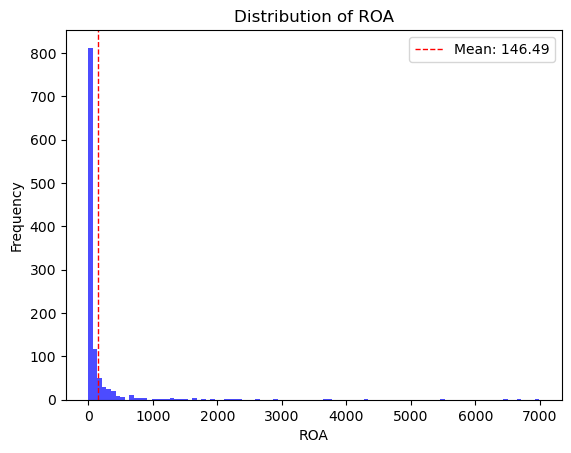

In [20]:
#ROA distribution

df['ROA'] = df['Total Revenue'] / df['Total Advertising Cost']

# Calculate and plot mean and median
mean_val = np.mean(df['ROA'])

plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_val:.2f}')

# Plotting a histogram
plt.hist(df['ROA'], bins=100, color='blue', alpha=0.7)
plt.title('Distribution of ROA')
plt.xlabel('ROA')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('ROAS_dist.png')
plt.show()

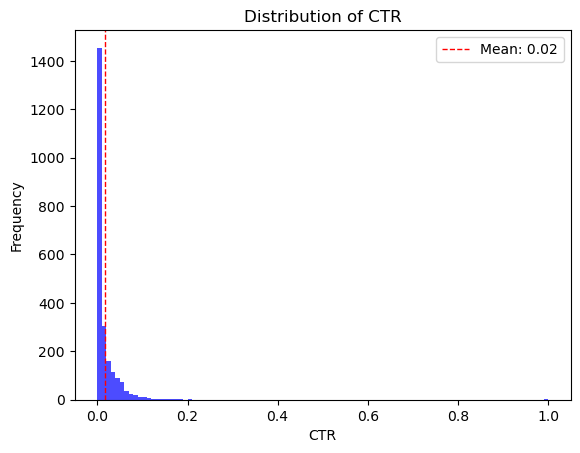

In [21]:
#CTR Distribution

# Calculate and plot mean and median
mean_val = np.mean(df['CTR'])

plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_val:.2f}')

# Plotting a histogram
plt.hist(df['CTR'], bins=100, color='blue', alpha=0.7)
plt.title('Distribution of CTR')
plt.xlabel('CTR')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('CTR_dist.png')
plt.show()

In [22]:
df.shape

(2333, 14)

In [23]:
ctr_sorted = t8.sort_values(by='CTR')
lowCTR_top10 = ctr_sorted['CTR'].head(10)

lowCTR_top10

Unified_Publisher  Keyword Type  Ad Group           
US                 broad         Battleship             0.000000
                   phrase        Plants vs. Zombies     0.000000
                   exact         Battleship             0.000000
                                 Boxhead                0.000000
                                 Shooting               0.000000
                   broad         Shooting               0.000000
                                 Online Zombie Games    0.000000
                   phrase        Zombie Games-M         0.002436
Global             phrase        online games-MG        0.002500
                                 kids games-MG          0.002579
Name: CTR, dtype: float64

In [24]:
roa_sorted = t8.sort_values(by='ROA')
lowROA_top10 = roa_sorted['ROA'].head(10)

lowROA_top10

Unified_Publisher  Keyword Type  Ad Group           
US                 exact         War Games               0.000000
                   phrase        War Games               0.000000
                   exact         Online Zombie Games     0.000000
                                 Plants vs. Zombies      0.000000
                   broad         War Games               0.000000
Global             exact         kids games -GG          6.879564
                   phrase        online games-GG         8.442513
US                 exact         kids games -YU         11.620851
                   phrase        onlinegames-OG         13.457242
                   exact         math games - GU        13.788704
Name: ROA, dtype: float64

# 8. Publisher-Specific Performance Enhancement Strategies

What strategies would you suggest for improving performance for each of the publishers?

- Optimizing Landing Pages:
Align landing pages with ad copy to improve conversions and conduct experiments to assess and enhance performance.
- Re-Marketing Ad Campaigns Based on User Behavior:
Implement tracking mechanisms to monitor user traffic to specific pages on our site and develop re-marketing ad campaigns for users visiting those pages to increase engagement.
- Audience Segmentation and Targeting:
Conduct a demographic analysis on the audience, gathering data on age, location, gender, and economic indicators and utilize insights to redefine marketing strategies through targeted ads.
- Performance Analysis:
Address suboptimal returns by redirecting ad spends for Overture and Google-Global to other publishers.
- Leveraging Best Performer (Yahoo-US):
Learn from the balanced performance of Yahoo-US in terms of Total Revenue, Advertising Cost, and ROAS.

In [71]:
t91 = df_unified.pivot_table(values=['Clicks','Impressions',  
                    'Total Advertising Cost','Conversions', 'Total Revenue'], 
                     index=['Publisher'], aggfunc=np.mean)

t92 = df_unified.pivot_table(values=['CTR', 'Avg CPC','Avg Position',
                    'Revenue per Conversion'], 
                     index=['Publisher'], aggfunc=np.mean)

t9 = pd.concat([t91, t92], axis=1)

t9['ROA'] = t9['Total Revenue']/t9['Total Advertising Cost']

t9

,Clicks,Conversions,Impressions,Total Advertising Cost,Total Revenue,Avg CPC,Avg Position,CTR,Revenue per Conversion,ROA
Publisher,,,,,,,,,,
Google-Global,4.448113,0.660377,109.358491,3.127453,101.658723,0.443443,4.253844,0.031240,181.284762,32.505278
Google-US,9.703608,1.845361,154.329897,7.037603,448.486590,0.643170,4.253763,0.030812,250.613262,63.727179
MSN-Global,0.919132,0.686391,147.398422,0.578323,62.866878,0.231243,4.428363,0.003488,114.680779,108.705389
MSN-US,0.920382,0.445860,135.159236,0.591592,60.840721,0.237834,4.157771,0.004089,122.758703,102.842303
Overture,5.485981,0.588785,123.383178,1.889252,62.422412,0.123925,3.245140,0.052358,111.316127,33.040802
Yahoo-Global,2.569892,0.551971,279.530466,1.718996,79.306731,0.315663,4.377599,0.005993,171.751541,46.135483
Yahoo-US,1.964968,0.550955,216.528662,0.906210,107.485280,0.291019,4.263885,0.006053,158.424817,118.609657


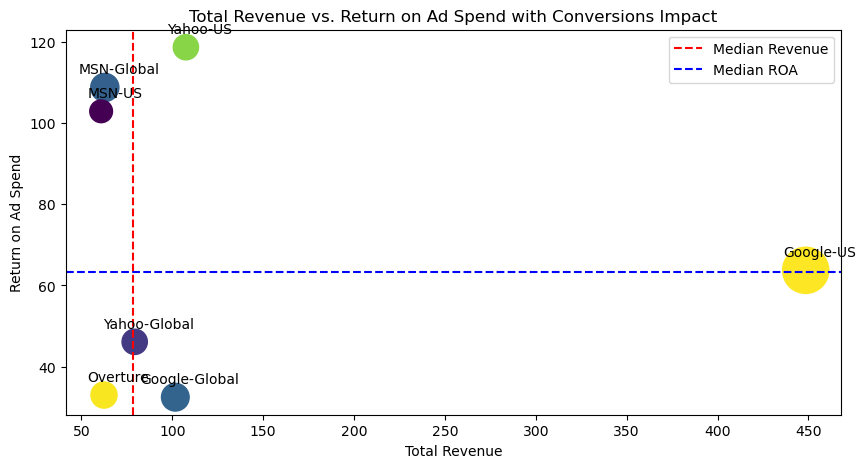

In [72]:
#use bubble chart to visualize
x= t9['Total Revenue']
y = t9['ROA']
size = t9['Conversions']*600
color = np.random.rand(7)

x_glb = rev_median
y_glb = roa_median

plt.figure(figsize = (10,5))
#plt.axis([-0.1,1,0.8,2]) #get with practice
plt.xlabel('Total Revenue')
plt.ylabel('Return on Ad Spend')
plt.title('Total Revenue vs. Return on Ad Spend with Conversions Impact')

plt.scatter(x,y,s = size, c = color)

# Plotting mean lines
plt.axvline(x=x_glb, color='red', linestyle='--', label='Median Revenue')
plt.axhline(y=y_glb, color='blue', linestyle='--', label='Median ROA')


for xi,yi, i in zip(x,y,x.index):
    plt.annotate(i,(xi,yi), textcoords = 'offset points',xytext = (10,10), ha = 'center')

plt.legend()
plt.show()

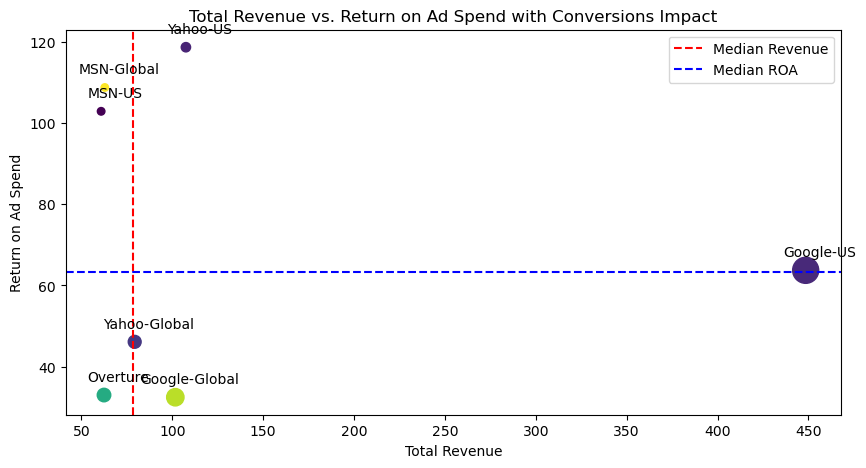

In [27]:
#use bubble chart to visualize
x= t9['Total Revenue']
y = t9['ROA']
size = t9['Total Advertising Cost']*50
color = np.random.rand(7)

x_glb = rev_median
y_glb = roa_median

plt.figure(figsize = (10,5))
#plt.axis([-0.1,1,0.8,2]) #get with practice
plt.xlabel('Total Revenue')
plt.ylabel('Return on Ad Spend')
plt.title('Total Revenue vs. Return on Ad Spend with Conversions Impact')

plt.scatter(x,y,s = size, c = color)

# Plotting mean lines
plt.axvline(x=x_glb, color='red', linestyle='--', label='Median Revenue')
plt.axhline(y=y_glb, color='blue', linestyle='--', label='Median ROA')


for xi,yi, i in zip(x,y,x.index):
    plt.annotate(i,(xi,yi), textcoords = 'offset points',xytext = (10,10), ha = 'center')

plt.legend()
plt.savefig('ROA_Rev_Pub.png')
plt.show()

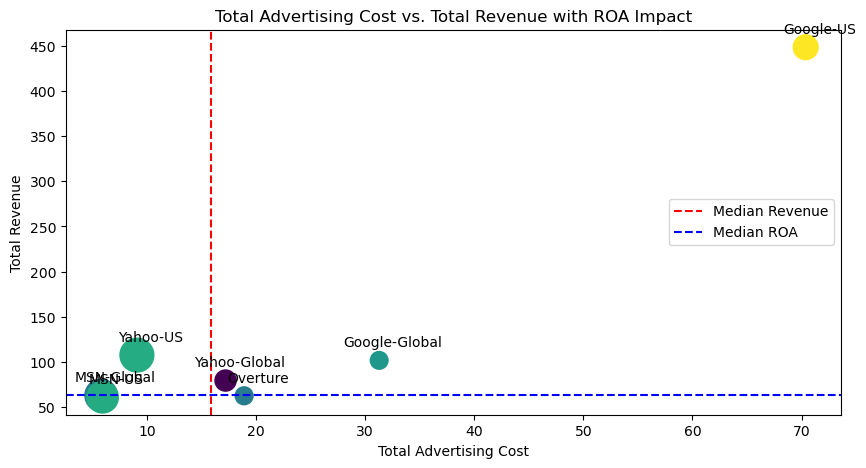

In [28]:
#use bubble chart to visualize
x= t9['Total Advertising Cost']*10
y = t9['Total Revenue']
size = t9['ROA']*5
color = np.random.rand(7)

x_glb = ads_median*10
y_glb = roa_median

plt.figure(figsize = (10,5))
#plt.axis([-0.1,1,0.8,2]) #get with practice
plt.xlabel('Total Advertising Cost')
plt.ylabel('Total Revenue')
plt.title('Total Advertising Cost vs. Total Revenue with ROA Impact')

plt.scatter(x,y,s = size, c = color)

# Plotting mean lines
plt.axvline(x=x_glb, color='red', linestyle='--', label='Median Revenue')
plt.axhline(y=y_glb, color='blue', linestyle='--', label='Median ROA')

for xi,yi, i in zip(x,y,x.index):
    plt.annotate(i,(xi,yi), textcoords = 'offset points',xytext = (10,10), ha = 'center')

plt.legend()
plt.show()